# Proyecto Naive Bayes

IMPORTS

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from pickle import dump
import contractions
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
total_data = pd.read_csv(url)
total_data.to_csv("/workspaces/ProyectoNaiveBayes/data/raw/playstore_reviews.csv")

In [7]:
total_data

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


DataSet Cleaning

In [8]:
total_data.drop("package_name", axis=1, inplace=True)

Expansion contracciones 

In [63]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text


In [64]:
# Expandir las contracciones en la columna "review"
total_data["review"] = total_data["review"].apply(expand_contractions)

In [65]:
# Convertir los datos a minúsculas
total_data["review"] = total_data["review"].str.strip().str.lower()


In [66]:
# Mostrar los primeros 10 elementos de la columna "review"
print(total_data["review"].head(10))

0    privacy at least put some option appear offlin...
1    messenger issues ever since the last update  i...
2    profile any time my wife or anybody has more t...
3    the new features suck for those of us who do n...
4    forced reload on uploading pic on replying com...
5    i do not know i cannot edit my posts  things s...
6    major flaws constant updates and always gettin...
7    video issues since i was forced into this upda...
8    this update completely destroyed my facebook  ...
9    posting issues for the last week  there is bee...
Name: review, dtype: object


In [67]:
#reemplazamos los caracteres no alfanumericos de la columna review con espacios en blanco
total_data["review"] = total_data["review"].replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)

In [68]:
total_data["review"].head(10)

0    privacy at least put some option appear offlin...
1    messenger issues ever since the last update  i...
2    profile any time my wife or anybody has more t...
3    the new features suck for those of us who do n...
4    forced reload on uploading pic on replying com...
5    i do not know i cannot edit my posts  things s...
6    major flaws constant updates and always gettin...
7    video issues since i was forced into this upda...
8    this update completely destroyed my facebook  ...
9    posting issues for the last week  there is bee...
Name: review, dtype: object

TRAIN Y TEST

In [69]:
X = total_data["review"]
y = total_data["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24, stratify= y)

# Save data
X_train.to_csv("/workspaces/ProyectoNaiveBayes/data/interim/train_x.csv", index = False)
y_train.to_csv("/workspaces/ProyectoNaiveBayes/data/interim/train_y.csv", index = False)
X_test.to_csv("/workspaces/ProyectoNaiveBayes/data/interim/test_x.csv", index = False)
y_test.to_csv("/workspaces/ProyectoNaiveBayes/data/interim/test_y.csv", index = False)

X_train.head()

287    not letting me log in  i try to log into my ac...
815    thanks you so much for adding sanshkar fm kala...
241    kill pages i will enter a url or open a new li...
697    its really lovely apps   i am allready using a...
37     used to be good everything was great  until i ...
Name: review, dtype: object

In [70]:
# Transform the text into a word count matrix.
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

# Save data
np.savetxt("/workspaces/ProyectoNaiveBayes/data/processed/train_x_vect.csv", X_train, delimiter=",")

np.savetxt("/workspaces/ProyectoNaiveBayes/data/processed/test_x_vect.csv", X_train, delimiter=",")

X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Modelo Multinomial

In [71]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Save model
dump(model, open("/workspaces/ProyectoNaiveBayes/models/model_basic.pk", "wb"))

Modelo Básico

In [73]:
y_pred = model.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [74]:
accuracy_score(y_train, y_pred)

0.9536516853932584

In [75]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [76]:
accuracy_score(y_test, y_pred)

0.8491620111731844

Matriz de confusión

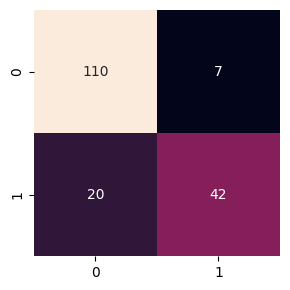

In [77]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [78]:
# Diccionario para buscar el mejor modelo
hyperparams = {"alpha": [1, 1.5, 1.8, 1.9, 2, 3, 4],
"force_alpha": [True, False],
"fit_prior": [True, False],
"class_prior": [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8], None]}

Mejor modelo con GridSearch

In [79]:
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 1.5, 1.8, 1.9, 2, 3, 4],
                         'class_prior': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],
                                         None],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 1.5, 1.8, 1.9, 2, 3, 4],
                         'class_prior': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],
                                         None],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [81]:
grid.best_params_

{'alpha': 3, 'class_prior': [0.3, 0.7], 'fit_prior': True, 'force_alpha': True}

In [82]:
best_model = grid.best_estimator_

#Guardamos
dump(best_model, open("/workspaces/ProyectoNaiveBayes/models/best_model_gs.pk", "wb"))

In [83]:
y_pred = best_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9283707865168539

In [84]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8603351955307262

Mejor modelo con ParameterGrid

In [85]:
accs = []
for combination in ParameterGrid(hyperparams):
    model = MultinomialNB(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = MultinomialNB(**best_combination)
best_model.fit(X_train, y_train)

#Guardamos
dump(best_model, open("/workspaces/ProyectoNaiveBayes/models/best_model_pg.pk", "wb"))

best_combination

{'alpha': 1, 'class_prior': None, 'fit_prior': False, 'force_alpha': True}

In [86]:
y_pred = best_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9606741573033708

In [87]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8435754189944135

Matriz de Confusión

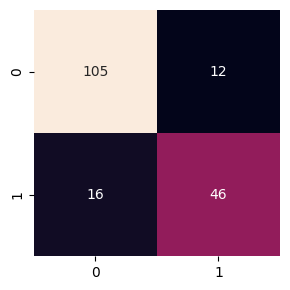

In [88]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

## CONCLUSIÓN

El mejor modelo ingenuo obtenido es Parameter Grid , el cual logró una precisión del 96% en el conjunto de entrenamiento y un 84% en el conjunto de prueba, con respecto al basico un 95%(train) y 84%(test) en el Modelo Básico y un 92%(train) y 86%(test) en el GridSearch